In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Read data from file
with open("/Users/jonasklein/slurm.cerulean.26768.txt", "r") as f:
    raw_data = f.readlines()

formatted_data = [line.strip().replace("'", '"') for line in raw_data]

dict_list = []
for line in formatted_data:
    if not line:
        continue
    try:
        if "inf" in line:
            fixed_line = line.replace("inf", "1e9")
        else:
            fixed_line = line

        dict_list.append(json.loads(fixed_line))
    except json.JSONDecodeError as e:
        print(f"Error parsing line: {line}\nError: {e}")

print(len(dict_list))

# Keep only every 50th and 51st element
filtered_dict_list = [d for i, d in enumerate(dict_list) if (i % 50) < 2]

# Print the final list length
print(len(filtered_dict_list))

# Save the final list to a new file
with open("/Users/jonasklein/slurm.cerulean.26768_processed.txt", "w") as f:
    for item in filtered_dict_list:
        f.write(json.dumps(item) + "\n")

# Convert to DataFrame
df = pd.DataFrame(filtered_dict_list)
df = df.sort_values("epoch")
df["epoch"] = pd.to_numeric(df["epoch"], errors="coerce")
#df["loss"] = df["loss"].interpolate()
#df["eval_loss"] = df["eval_loss"].interpolate()
#df["grad_norm"] = df["grad_norm"].interpolate()

# Train data: Rows where 'learning_rate' or 'grad_norm' is NOT NaN
df_train = df[df["learning_rate"].notna() | df["grad_norm"].notna()].reset_index(drop=True)
# Drop eval_loss column, eval_runtimen, eval_samples_per_second and eval_steps_per_second
df_train = df_train.drop(columns=["eval_loss", "eval_runtime", "eval_samples_per_second", "eval_steps_per_second"])

print(df_train)

# Validation data: Rows where 'learning_rate' and 'grad_norm' are both NaN
df_valid = df[df["learning_rate"].isna() & df["grad_norm"].isna()].reset_index(drop=True)
# Drop loss column
df_valid = df_valid.drop(columns=["loss", "grad_norm", "learning_rate"])
print(df_valid)

# Show the row in df_train where grad_norm is 1e9
print(df_train[df_train["grad_norm"] == 1e9])


4027
162
      loss  grad_norm  learning_rate  epoch
0   8.0129   1.807380       0.000050   0.04
1   6.3184   1.836357       0.000049   1.04
2   6.1824   1.793488       0.000049   2.04
3   6.1296   1.913208       0.000048   3.04
4   6.0360   1.891041       0.000048   4.05
..     ...        ...            ...    ...
76  1.3365   7.735323       0.000012  76.16
77  1.3002   7.486381       0.000011  77.16
78  1.2511   6.358018       0.000011  78.17
79  1.3036   6.766158       0.000010  79.17
80  1.2643   7.190086       0.000010  80.17

[81 rows x 4 columns]
    epoch  eval_loss  eval_runtime  eval_samples_per_second  \
0    0.04   7.190301        8.4857                  294.143   
1    1.04   6.301386       11.1316                  224.227   
2    2.04   6.169350       12.6980                  196.566   
3    3.04   6.102542        8.4579                  295.109   
4    4.05   6.075548        8.4045                  296.985   
..    ...        ...           ...                      ...   

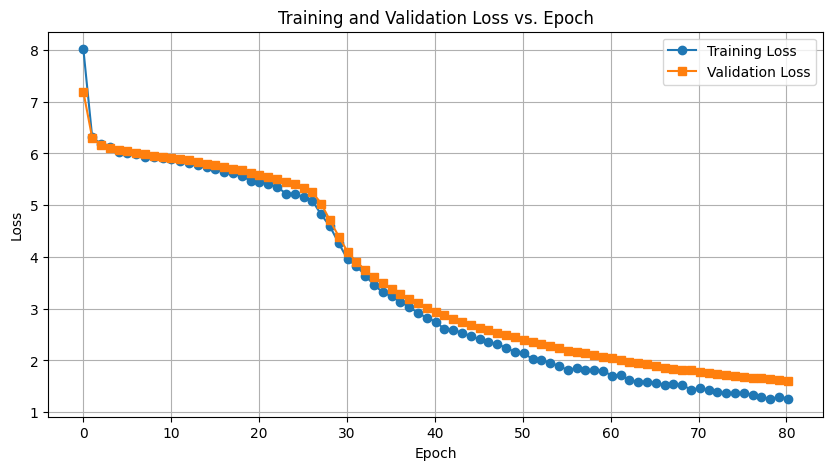

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(df_train["epoch"], df_train["loss"], label="Training Loss", marker="o", linestyle="-", linewidth=1.5)
plt.plot(df_valid["epoch"], df_valid["eval_loss"], label="Validation Loss", marker="s", linestyle="-", linewidth=1.5)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs. Epoch")
plt.legend()
plt.grid(True)
plt.show()

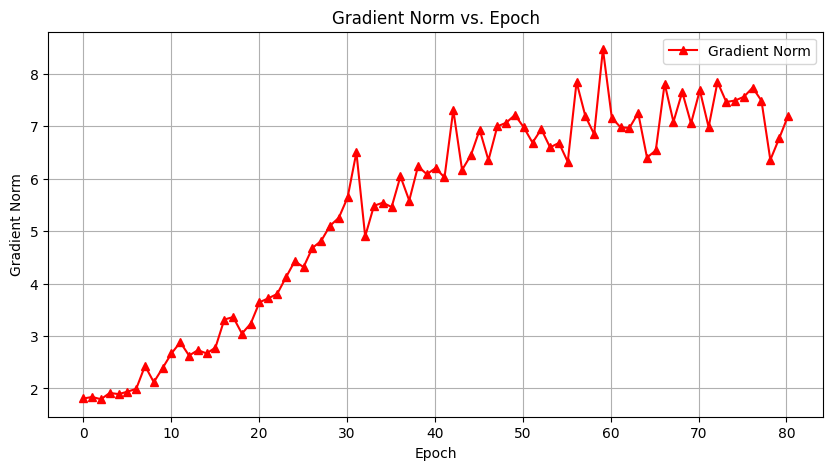

In [28]:
# Plotting Gradient Norm vs Epoch
plt.figure(figsize=(10, 5))
plt.plot(df_train["epoch"], df_gn["grad_norm"], label="Gradient Norm", marker="^", color="r")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm vs. Epoch")
plt.legend()
plt.grid(True)
plt.show()

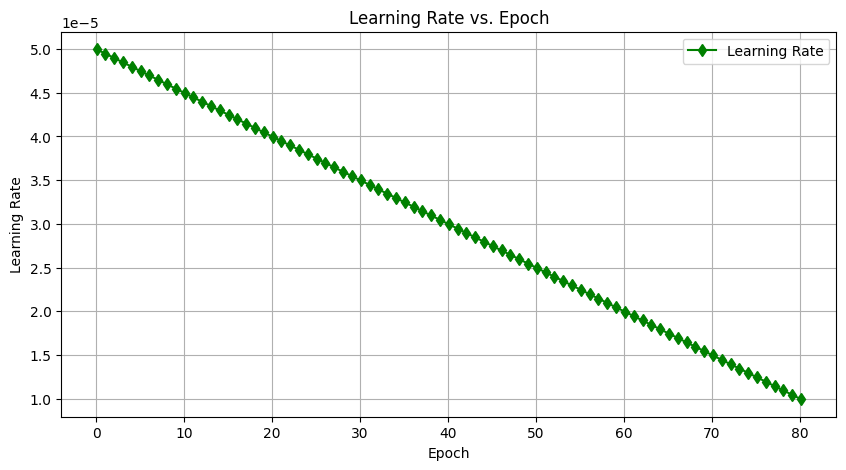

In [29]:
# Plotting Learning Rate vs Epoch
plt.figure(figsize=(10, 5))
plt.plot(df_train["epoch"], df_train["learning_rate"], label="Learning Rate", marker="d", color="g")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate vs. Epoch")
plt.legend()
plt.grid(True)
plt.show()